## 9

In [1]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import time
from sklearn.decomposition import PCA
from sklearn.svm import SVC
import numpy as np

In [2]:
mnist = fetch_openml('mnist_784', version=1)
mnist.target = mnist.target.astype(np.uint8)

In [3]:
#without pca
X_train, X_test, y_train, y_test = train_test_split(mnist['data'], mnist['target'], test_size=10000)
start = time.time()
rf = RandomForestClassifier(n_estimators=69, random_state=42, n_jobs=3, verbose=1).fit(X_train, y_train)
print("Training time: " + str(time.time()-start))
print("Accuracy: " + str(accuracy_score(y_test, rf.predict(X_test))))

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    6.0s
[Parallel(n_jobs=3)]: Done  69 out of  69 | elapsed:    9.4s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.


Training time: 9.765230417251587
Accuracy: 0.9668


[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  69 out of  69 | elapsed:    0.0s finished


In [4]:
#with pca
pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)
X_test_reduced = pca.transform(X_test)
start = time.time()
rf2 = RandomForestClassifier(n_estimators=69, random_state=42, n_jobs=3, verbose=1).fit(X_train_reduced, y_train)
print("Training time: " + str(time.time()-start))
print("Accuracy: " + str(accuracy_score(y_test, rf2.predict(X_test_reduced))))
#wiyh pca not always faster, depends on data
#also lower accuracy

[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:   12.6s


Training time: 20.191588401794434
Accuracy: 0.9435


[Parallel(n_jobs=3)]: Done  69 out of  69 | elapsed:   20.0s finished
[Parallel(n_jobs=3)]: Using backend ThreadingBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  44 tasks      | elapsed:    0.0s
[Parallel(n_jobs=3)]: Done  69 out of  69 | elapsed:    0.0s finished


## 10

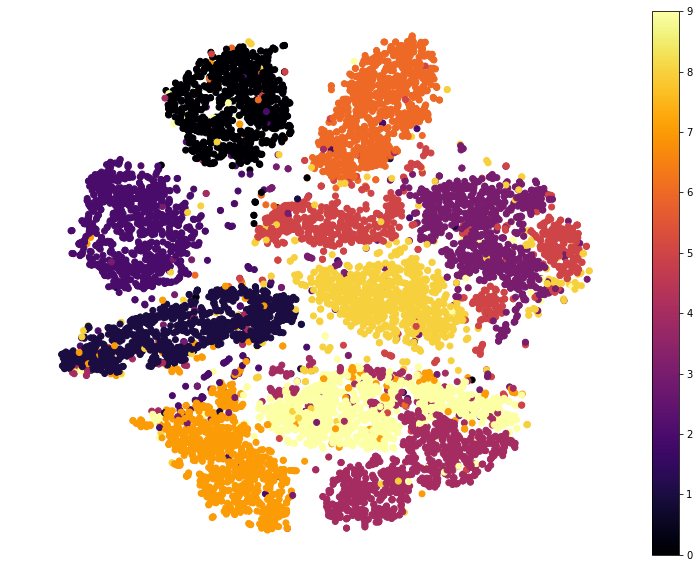

In [7]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

tsne = TSNE(n_components=2, random_state=42).fit_transform(X_train[:10000])
plt.figure(figsize=(13,10))
plt.scatter(tsne[:, 0], tsne[:, 1], c=y_train[:10000], cmap='inferno')
plt.axis('off')
plt.colorbar()